In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

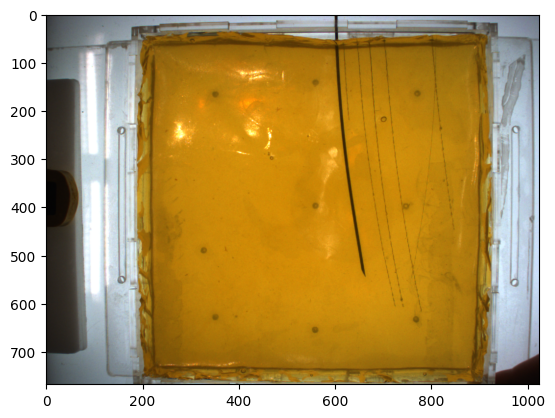

In [2]:
img = cv2.imread('needle_images_new/right_0.10502971240232001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

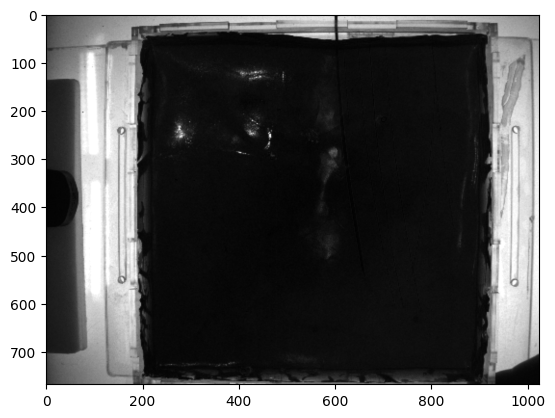

In [3]:
img_b = img[:, :, 2]

plt.imshow(img_b, cmap='gray')
plt.show()

Text(0.5, 0.5, 's')

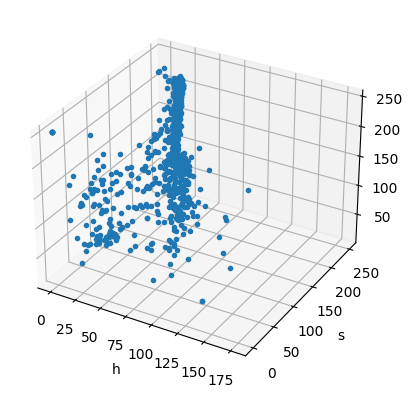

In [4]:
from scipy.cluster.vq import kmeans
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_flat = img_hsv.reshape((-1, 3))
idx = np.linspace(0, 768*1024-1, 1000).astype('int')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(img_flat[idx,0], img_flat[idx,1], img_flat[idx,2], '.')
ax.set_xlabel('h')
ax.set_ylabel('s')

Text(0.5, 0.5, 'g')

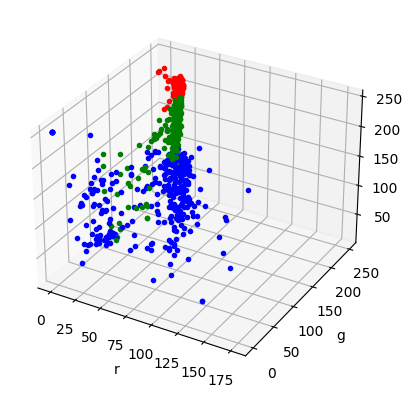

In [5]:
from scipy.cluster.vq import kmeans
fig = plt.figure()
fig.clf()
ax = fig.add_subplot(projection='3d')
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_flat = img_hsv.reshape((-1, 3))

idx = np.linspace(0, 768*1024-1, 1000).astype('int')
img_flat_sp = img_flat[idx, :]

center, _ = kmeans(img_flat.astype(float), 3)
c = []

for i in range(len(img_flat_sp)):
    d = [sum(np.abs(img_flat_sp[i,:]-center[0,:])), 
         sum(np.abs(img_flat_sp[i,:]-center[1,:])),
         sum(np.abs(img_flat_sp[i,:]-center[2,:]))]
    if max(d) == d[0]:
        c = 'r'
    elif max(d) == d[1]:
        c = 'g'
    else:
        c = 'b'
    ax.plot(img_flat_sp[i,0], img_flat_sp[i,1], img_flat_sp[i,2], '.', color=c)

ax.set_xlabel('r')
ax.set_ylabel('g')



# Using RGB Color

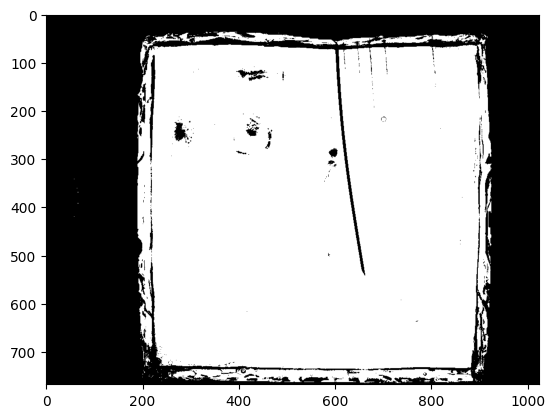

In [26]:
threshold = [80, 80, 50]
mask_phantom = np.bitwise_and(np.bitwise_and(img[:,:,0]>threshold[0], img[:,:,1]>threshold[1]), img[:,:,2]<threshold[2])

plt.imshow(mask_phantom, cmap='gray')
plt.show()

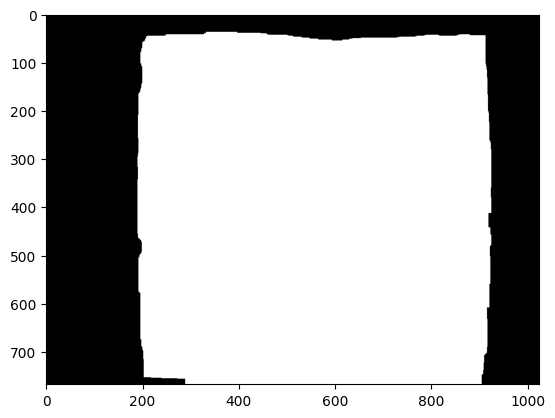

In [31]:
kernel = np.ones((3, 3), np.uint8)
mask_phantom = mask_phantom.astype(np.uint8)
# print(mask_phantom2.dtype)
mask_phantom = cv2.morphologyEx(mask_phantom, cv2.MORPH_CLOSE, kernel, iterations=10)
mask_phantom = cv2.morphologyEx(mask_phantom, cv2.MORPH_OPEN, kernel, iterations=10)
plt.imshow(mask_phantom, cmap='gray')
plt.show()

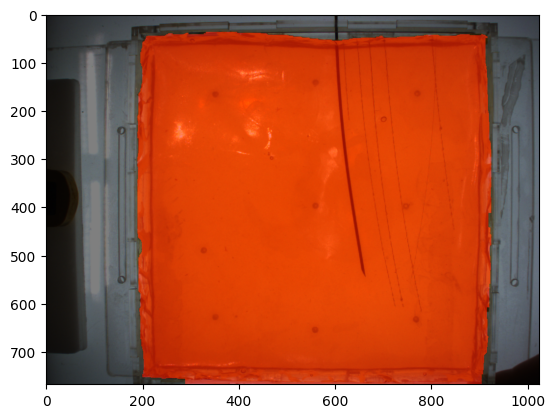

In [28]:
img_phantom = np.zeros(img.shape, dtype=int)
img_phantom[:, :, 0] = mask_phantom * 255

overlayed_img = 0.5 * img + 0.5 * img_phantom
overlayed_img = overlayed_img.astype(int)
plt.imshow(overlayed_img)
plt.show()

# Using HSL color

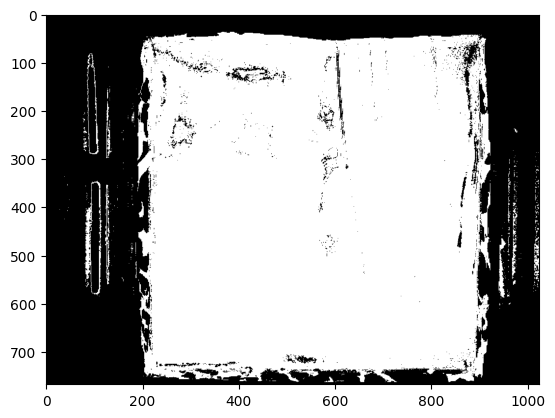

In [3]:
img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
threshold = 200
mask_phantom2_raw = img_hls[:,:,2] > threshold

plt.imshow(mask_phantom2_raw, cmap='gray')
plt.show()

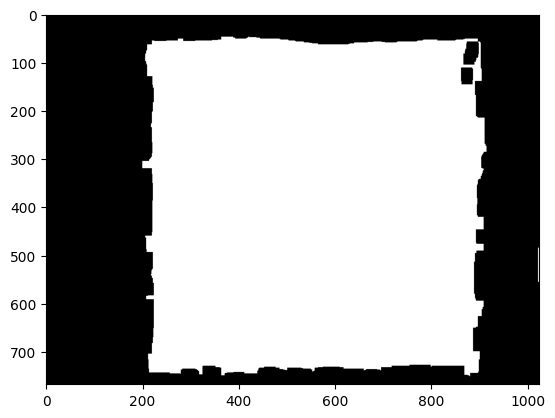

In [4]:
kernel = np.ones((3, 3), np.uint8)
mask_phantom2 = mask_phantom2_raw.astype(np.uint8)
# print(mask_phantom2.dtype)

mask_phantom2 = cv2.morphologyEx(mask_phantom2, cv2.MORPH_CLOSE, kernel, iterations=3)
mask_phantom2 = cv2.erode(mask_phantom2, kernel, iterations=8)
# mask_phantom2 = cv2.morphologyEx(mask_phantom2, cv2.MORPH_OPEN, kernel, iterations=10)

# mask_phantom2 = cv2.threshold(mask_phantom2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# mask_phantom2 = cv2.morphologyEx(mask_phantom2, cv2.MORPH_CLOSE, kernel, iterations=10)
plt.imshow(mask_phantom2, cmap='gray')
plt.show()

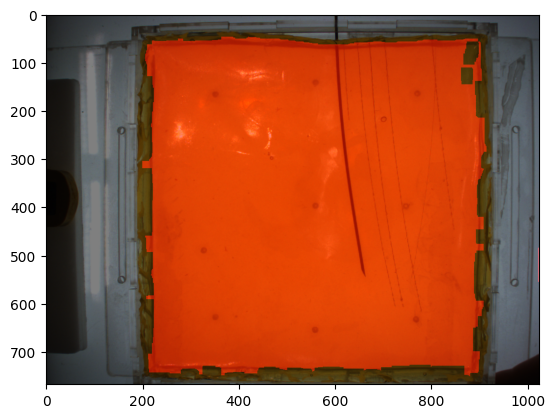

In [5]:
img_phantom = np.zeros(img.shape, dtype=int)
img_phantom[:, :, 0] = mask_phantom2 * 255

overlayed_img = 0.5 * img + 0.5 * img_phantom
overlayed_img = overlayed_img.astype(int)
plt.imshow(overlayed_img)
plt.show()

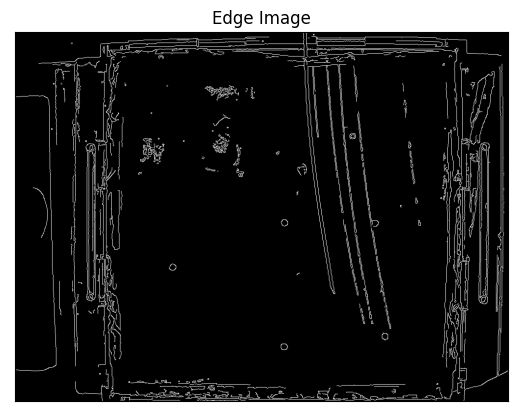

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
edges = cv.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Laplacian')

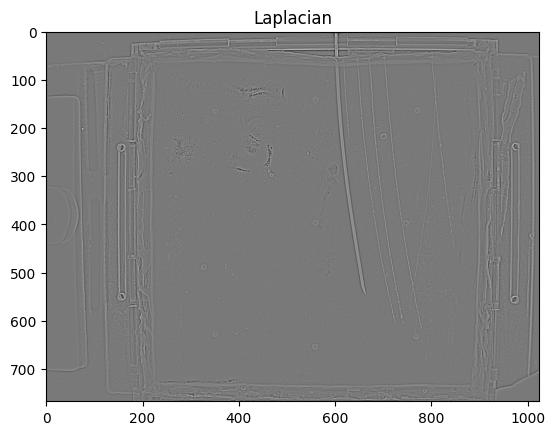

In [6]:
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
laplacian = cv2.Laplacian(img_grey,cv2.CV_64F,ksize=5)

plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')

Text(0.5, 1.0, 'Laplacian')

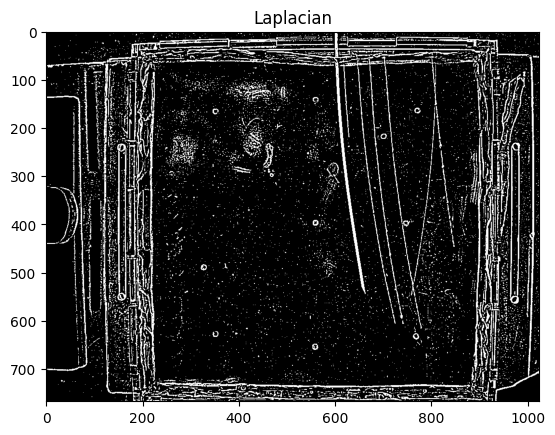

In [7]:
plt.imshow(laplacian > 150,cmap = 'gray')
plt.title('Laplacian')

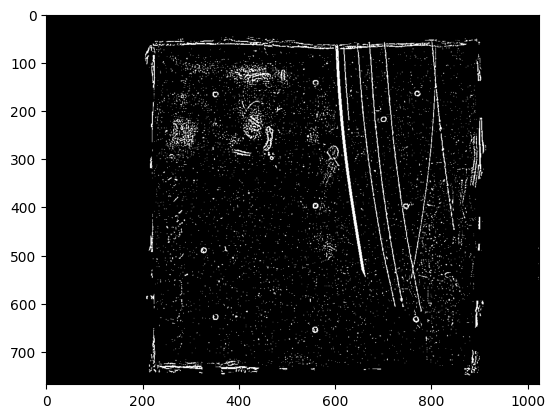

In [11]:
needle_raw = np.bitwise_and(laplacian>150, mask_phantom2)
plt.imshow(needle_raw,cmap = 'gray')

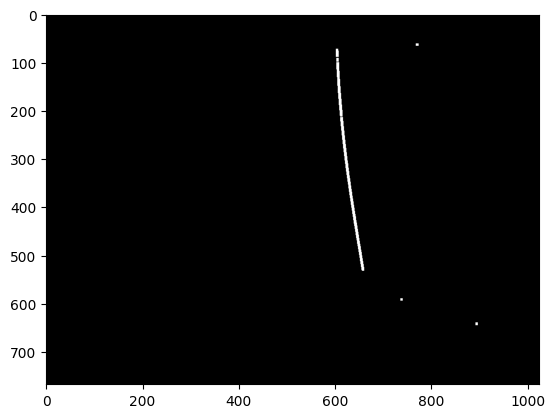

In [9]:
needle = cv2.morphologyEx(needle_raw, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(needle,cmap = 'gray')

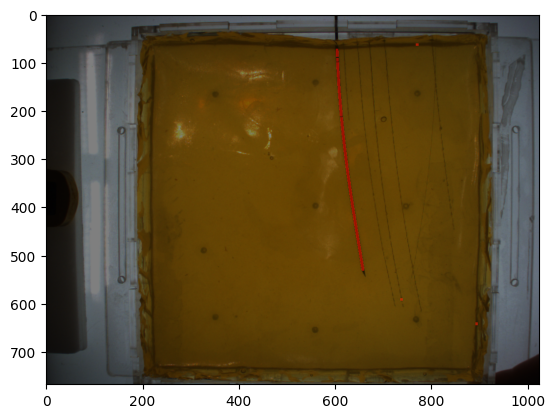

In [10]:
img_needle = np.zeros(img.shape, dtype=int)
img_needle[:, :, 0] = needle * 255

overlayed_img = 0.5 * img + 0.5 * img_needle
overlayed_img = overlayed_img.astype(int)
plt.imshow(overlayed_img)
plt.show()